In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPU available: []


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# ✅ IMPORTANT: Update this to match your real folder path
data_dir = "/Users/sunidhijain13/Breast Cancer Detection /data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast"

# ✅ Image Data Generator with rescaling and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# ✅ Training data
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# ✅ Validation data
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# ✅ Check some details
print("Training batches:", train_gen.samples)
print("Validation batches:", val_gen.samples)
print("Class indices:", train_gen.class_indices)


Found 6328 images belonging to 2 classes.
Found 1581 images belonging to 2 classes.
Training batches: 6328
Validation batches: 1581
Class indices: {'benign': 0, 'malignant': 1}


In [3]:
# The CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Simple CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print model summary
model.summary()


/Users/sunidhijain13/Breast Cancer Detection /venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


/Users/sunidhijain13/Breast Cancer Detection /venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 118s 591ms/step - accuracy: 0.6937 - loss: 0.8306 - val_accuracy: 0.7906 - val_loss: 0.4983
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 126s 634ms/step - accuracy: 0.8100 - loss: 0.4654 - val_accuracy: 0.7887 - val_loss: 0.4649
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 124s 627ms/step - accuracy: 0.8325 - loss: 0.4395 - val_accuracy: 0.8482 - val_loss: 0.3859
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 142s 715ms/step - accuracy: 0.8252 - loss: 0.4378 - val_accuracy: 0.7755 - val_loss: 0.5712
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 145s 731ms/step - accuracy: 0.8223 - loss: 0.4476 - val_accuracy: 0.7362 - val_loss: 0.5669
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 145s 730ms/step - accuracy: 0.8327 - loss: 0.4197 - val_accuracy: 0.7388 - val_loss: 0.4971
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 142s 717ms/step - accuracy: 0.8170 - loss: 0.4143 - val_accuracy: 0.8355 - val_loss: 0.4126
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 150s 758ms/step - accuracy: 0.8536 -

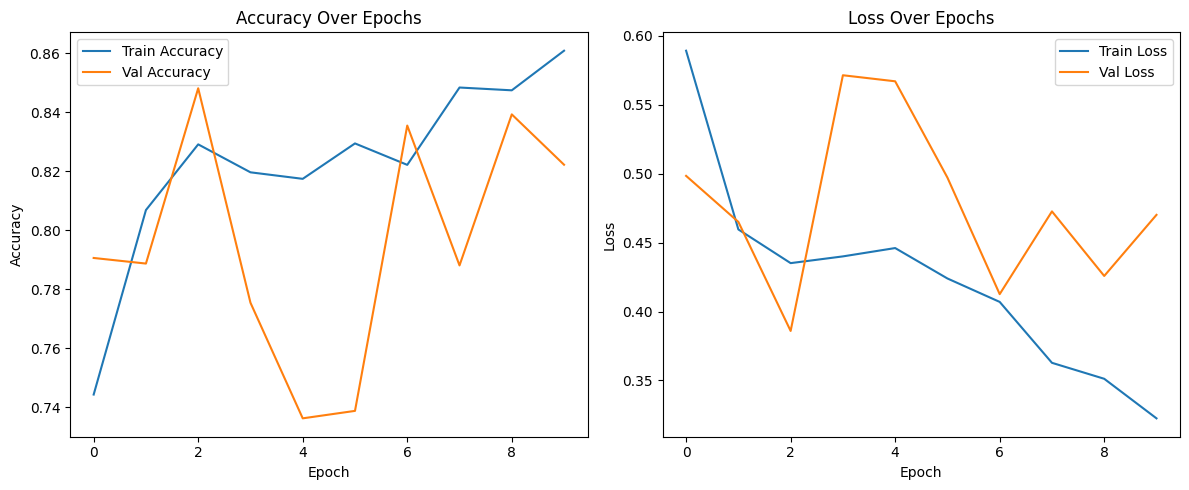

50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 243ms/step

Classification Report:
              precision    recall  f1-score   support

      Benign       0.28      0.18      0.22       496
   Malignant       0.68      0.79      0.73      1085

    accuracy                           0.60      1581
   macro avg       0.48      0.48      0.47      1581
weighted avg       0.55      0.60      0.57      1581

Confusion Matrix:
[[ 89 407]
 [232 853]]


In [5]:
# Evaluate Model Performance

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Plot Accuracy & Loss Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Predict on Validation Set
val_gen.reset()
preds = model.predict(val_gen, verbose=1)
y_pred = (preds > 0.5).astype(int).reshape(-1)
y_true = val_gen.classes

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Benign", "Malignant"]))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


In [6]:
model.save("breast_cancer_cnn_model.h5")
